In [11]:
# Importing the necessary libraries
import numpy as np  # NumPy for numerical operations and array manipulation
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import pandas as pd  # Pandas for handling datasets

In [13]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')  # Loading dataset from a CSV file
X = dataset.iloc[:, [2, 3]].values  # Selecting columns 2 and 3 (Age and Estimated Salary) as features
y = dataset.iloc[:, 4].values  # Selecting column 4 (Purchased: 0 or 1) as the target variable

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split  # Importing function for dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Splitting the dataset into 75% training data and 25% testing data
# `random_state=0` ensures reproducibility of results

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler  # Importing StandardScaler for normalization
sc_X = StandardScaler()  # Creating an instance of StandardScaler
X_train = sc_X.fit_transform(X_train)  # Scaling the training data
X_test = sc_X.transform(X_test)  # Scaling the test data (without fitting again)

In [16]:
# Fitting the K-Nearest Neighbors (K-NN) classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier  # Importing the K-NN classifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
# Creating a K-NN model with 5 neighbors and Minkowski distance (p=2, equivalent to Euclidean distance)
classifier.fit(X_train, y_train)  # Training the K-NN classifier on the training data

KNeighborsClassifier()

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)  # Making predictions on the test set

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix  # Importing confusion matrix for evaluation
cm = confusion_matrix(y_test, y_pred)  # Creating a confusion matrix to assess model performance

In [19]:

# Visualizing the Training set results
from matplotlib.colors import ListedColormap  # Importing color maps for visualization
X_set, y_set = X_train, y_train  # Assigning training set data to variables for plotting
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

<ipython-input-25-dc90e4cd896c>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


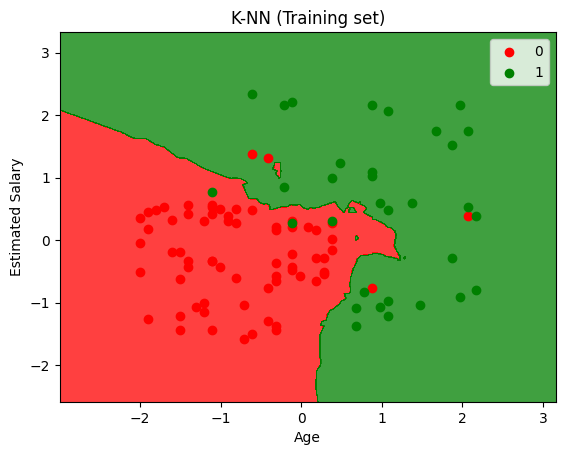

In [25]:
# Creating a grid of points to visualize the decision boundary

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
# Plotting the decision boundary using contour plot, coloring different regions for classification

plt.xlim(X1.min(), X1.max())  # Setting x-axis limits
plt.ylim(X2.min(), X2.max())  # Setting y-axis limits

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
# Plotting the training set points with different colors based on class labels

plt.title('K-NN (Training set)')  # Setting the plot title
plt.xlabel('Age')  # Labeling x-axis
plt.ylabel('Estimated Salary')  # Labeling y-axis
plt.legend()  # Displaying the legend
plt.show()  # Showing the plot

In [27]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap  # Importing color maps again for visualization
X_set, y_set = X_test, y_test  # Assigning test set data to variables for plotting
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

<ipython-input-29-256b09a31fc7>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


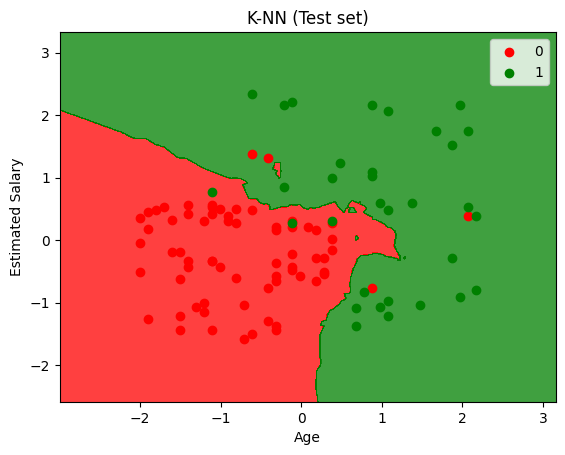

In [29]:
# Creating a grid of points to visualize the decision boundary for test set

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
# Plotting the decision boundary

plt.xlim(X1.min(), X1.max())  # Setting x-axis limits
plt.ylim(X2.min(), X2.max())  # Setting y-axis limits

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
# Plotting the test set points with different colors based on class labels

plt.title('K-NN (Test set)')  # Setting the plot title
plt.xlabel('Age')  # Labeling x-axis
plt.ylabel('Estimated Salary')  # Labeling y-axis
plt.legend()  # Displaying the legend
plt.show()  # Showing the plot
#Split the dataset into a training set (75%) and a test set (25%).
#Normalize the data using feature scaling.
#Train a K-Nearest Neighbors (K-NN) classifier with k=5 using the Minkowski distance metric.
#Predict the test set results and evaluate the model using a confusion matrix.
#Visualize the decision boundary for both the training and test sets.